Binary Classification on UCI Mushroom Dataset
Edible or Poisonous?

In [12]:
import numpy as np

import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [10]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Read Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Neural Networks don't understand letters. We need to encode them

In [3]:
# Quick way to encode whole dataframe
df_enc = df.apply(LabelEncoder().fit_transform)
# everything is encoded now
data = df_enc.values  # data is an array. Keras likes arrays
headers = list(df.columns.values) #store features of mushrooms
print(data.shape, type(data))
print(data)

(8124, 23) <class 'numpy.ndarray'>
[[1 5 2 ... 2 3 5]
 [0 5 2 ... 3 2 1]
 [0 0 2 ... 3 2 3]
 ...
 [0 2 2 ... 0 1 2]
 [1 3 3 ... 7 4 2]
 [0 5 2 ... 4 1 2]]


Split and prepare y (objective) is in column 1

In [4]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


Let's define the network

In [7]:
model = Sequential()
model.add(Dense(11, input_shape=(22,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 11)                253       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,550
Trainable params: 1,550
Non-trainable params: 0
_________________________________________________________________


train

In [ ]:
hist = model.fit(x_train, y_train, epochs=25, shuffle=True,batch_size=10,validation_data=(x_test, y_test))

Train on 6499 samples, validate on 1625 samples
Epoch 1/25
6499/6499 [==============================] - 12s 2ms/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.4071 - val_acc: 0.8966
Epoch 2/25
6499/6499 [==============================] - 12s 2ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.2151 - val_acc: 0.9440
Epoch 3/25
6499/6499 [==============================] - 11s 2ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.2159 - val_acc: 0.9458
Epoch 4/25
6499/6499 [==============================] - 11s 2ms/step - loss: 0.0079 - acc: 0.9971 - val_loss: 0.1892 - val_acc: 0.9594
Epoch 5/25
6499/6499 [==============================] - 10s 2ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.1689 - val_acc: 0.9569
Epoch 6/25
6499/6499 [==============================] - 10s 2ms/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.2010 - val_acc: 0.9569
Epoch 7/25
6499/6499 [==============================] - 13s 2ms/step - loss: 3.0674e-04 - acc: 1.0000 - val_loss: 0.1378 - val_acc: 0.9705
Epo

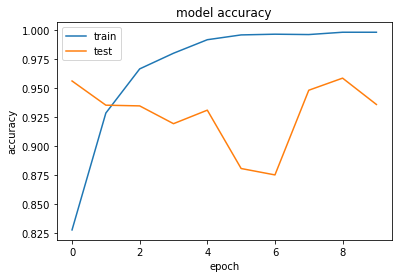

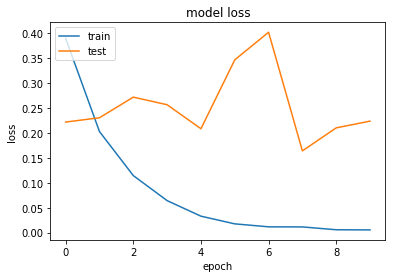

In [13]:
Analyze_training(hist)